<h1>MNIST DATASET</h1>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import cv2
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.optimizers import SGD

import warnings                      
warnings.simplefilter("ignore")  # ignores the warning

# Load .npy file


In [3]:
# Load the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

# Visualize

In [4]:
import random

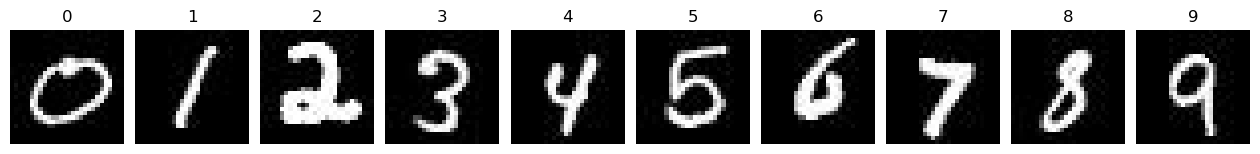

In [7]:
def random_value_for_index(labels, target_value):
    indices = [index for index, value in enumerate(labels) if value == target_value]
    return random.choice(indices)

# Define categories
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Train Test Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=11)

In [9]:
print("X_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (33600, 784)
y_train shape :  (33600,)
X_test shape :  (8400, 784)
y_test shape :  (8400,)


# Normalization

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# train ANN Model

In [12]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Early Stoping

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=5)

# Compile

In [17]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train

In [18]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1,callbacks=[early_stop])

Epoch 1/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1035 - loss: 2.3015 - val_accuracy: 0.2060 - val_loss: 2.2933
Epoch 2/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2199 - loss: 2.2916 - val_accuracy: 0.2664 - val_loss: 2.2838
Epoch 3/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2656 - loss: 2.2822 - val_accuracy: 0.3057 - val_loss: 2.2743
Epoch 4/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3074 - loss: 2.2726 - val_accuracy: 0.3551 - val_loss: 2.2643
Epoch 5/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3527 - loss: 2.2621 - val_accuracy: 0.3988 - val_loss: 2.2533
Epoch 6/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4039 - loss: 2.2512 - val_accuracy: 0.4426 - val_loss: 2.2411
Epoch 7/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4481 - loss: 2.2391 - val_accuracy: 0.4759 - val_loss: 2.2276
Epoch 8/100
945/945 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4736 - loss: 2.2254 - val_accu

# Metrics

In [19]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

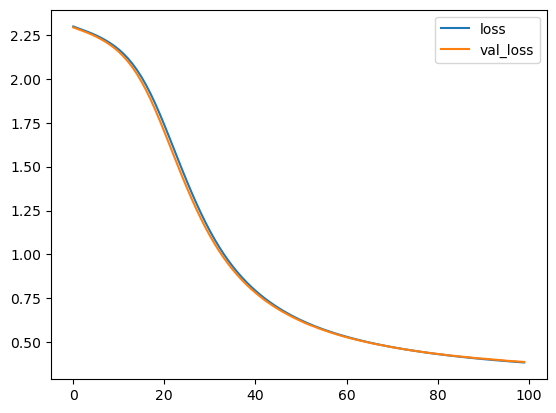

In [20]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

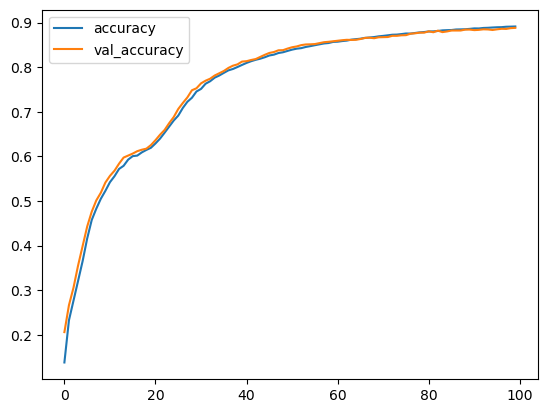

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

In [22]:
model.save("model/mnist_ann.h5")

In [23]:
from keras.models import load_model
model= load_model("model/mnist_ann.h5")

# Predict on Test data

In [33]:
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([1, 9, 6, ..., 1, 5, 0], dtype=int64)

# Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [36]:
print("Model's acuracy :", accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.8895238095238095
Recall-Score : 0.8876037498314829
Precision-Score : 0.8875902008780742
F1-Score : 0.8875015793981046


In [37]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       863
           1       0.96      0.93      0.95       958
           2       0.86      0.88      0.87       837
           3       0.86      0.88      0.87       854
           4       0.88      0.89      0.89       822
           5       0.82      0.85      0.83       741
           6       0.92      0.91      0.91       823
           7       0.91      0.92      0.92       898
           8       0.85      0.84      0.84       783
           9       0.85      0.83      0.84       821

    accuracy                           0.89      8400
   macro avg       0.89      0.89      0.89      8400
weighted avg       0.89      0.89      0.89      8400



# Predict

In [38]:
def classify_image(image):
    plt.imshow(cv2.resize(image(28, 28)), cmap='gray')
    image = image.reshape(1, -1)

    prediction = np.argmax(model.predict(image))
    return prediction

In [41]:
classify_image(x_test[0])

TypeError: 'numpy.ndarray' object is not callable

# Custom

In [42]:
def classify_image_custom(image):
    image = cv2.resize(image, (28, 28))

    plt.imshow(image, cmap='gray')
    image = tf.keras.utils.normalize(image, axis=1)

    image = image.flatten()
    print(image)
    image = np.expand_dims(image, axis=0)
    print(image)
    print(image.shape)

    prediction = np.argmax(model.predict(image))
    return prediction

[0.         0.         0.         0.         0.         0.
 0.         0.         0.43905704 0.         0.         0.
 0.32929278 0.         0.         0.21952852 0.         0.
 0.         0.5488213  0.21952852 0.         0.         0.5488213
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.45807867 0.687118   0.22903933 0.
 0.         0.28629917 0.05725983 0.         0.11451967 0.28629917
 0.28629917 0.05725983 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.52915026 0.
 0.         0.37796447 0.         0.         0.15118579 0.
 0.52915026 0.30237158 0.         0.         0.         0.30237158
 0.30237158 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.8131434  0.         0.         0.
 0.         0.29568851 0.44353276

0

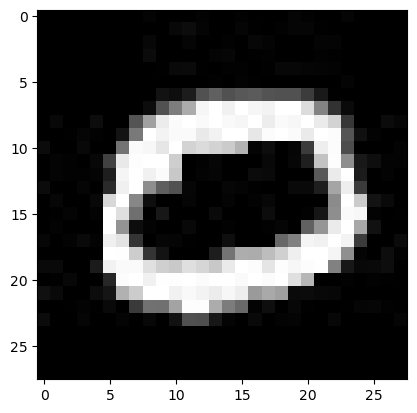

In [43]:
img = cv2.imread('data/test/img_2.jpg', cv2.IMREAD_GRAYSCALE)
classify_image_custom(img)